In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import seaborn as sns

In [23]:
data_dir = "../dataset/heart_cleaned.csv"
df = pd.read_csv(data_dir)

In [24]:
features = ['cp','thalach', 'exang', 'oldpeak']
target = 'target'

In [25]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# define param grid:
pipeline = Pipeline(steps=[
    ('preprocessing', StandardScaler()),  # Default to StandardScaler
    ('classifier', LogisticRegression(max_iter=10000))
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'preprocessing': [StandardScaler(), MinMaxScaler(), Normalizer(), None],  # Include different preprocessing methods
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best parameters and best accuracy
print("Best parameters found: ", grid_search.best_params_)
print(f"Best accuracy: {grid_search.best_score_:.2f}")

Best parameters found:  {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga', 'preprocessing': None}
Best accuracy: 0.77


In [27]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with best parameters: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

Test set accuracy with best parameters: 0.89
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.91      0.94      0.92        31

    accuracy                           0.89        46
   macro avg       0.88      0.87      0.87        46
weighted avg       0.89      0.89      0.89        46

[[12  3]
 [ 2 29]]


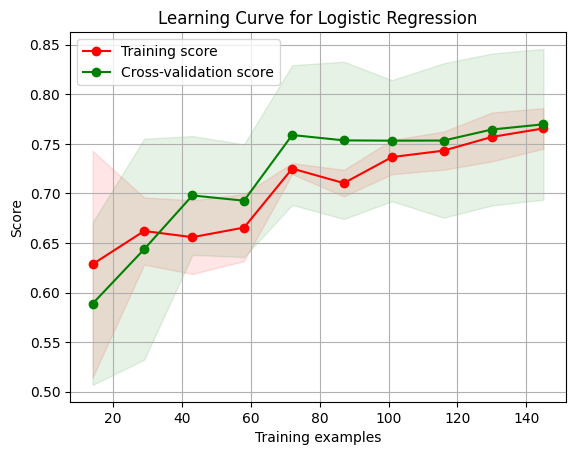

In [28]:

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot the learning curve
title = "Learning Curve for Logistic Regression"
estimator = grid_search.best_estimator_
plot_learning_curve(estimator, title, X_train, y_train, cv=5)

# Show the plot
plt.show()
